# Entrega Opcional 1: Junjie Li


The conda downloader does not support downloading this package directly : **simpleaudio**


https://github.com/hamiltron/py-simple-audio

python pip install git+ <link>
or
Go to gitrepo to download this file and unzip it 

> py-simple-audio$: python setup.py install

IMPORTANT POINT: This package requires C++ v14.0 or higher

In [2]:
import sounddevice as sd
from scipy.io.wavfile import write
import numpy as np
import simpleaudio as sa
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

### 1.- Fer una captura durant 2 segons de la vostra veu

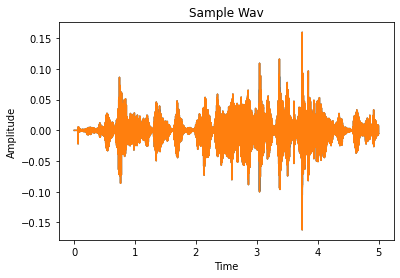

In [4]:
# record sound

fs = 44100   # Sample rate
seconds = 5  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished

write('output.wav', fs, myrecording)  # Save as WAV file 

time = np.arange(0,5,1/44100)
plt.plot(time, myrecording)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Sample Wav")
plt.show()

In [5]:
print(type(myrecording))
print(myrecording.shape)
print(type(myrecording[0,0]))

<class 'numpy.ndarray'>
(220500, 2)
<class 'numpy.float32'>


In [6]:
# play sound
sd.play(myrecording, 44100)

Sample rate: 44100
audio: 220500
temps:  220500


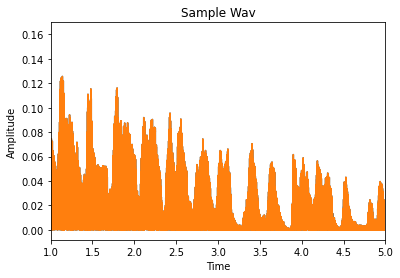

In [7]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt


# read audio samples
input_data = read("output3.wav")

audio = input_data[1]
print("Sample rate:", input_data[0])
print("audio:", len(audio))
time = np.arange(0, 5, 1/44100)#afegim l'offset vist experimentalment 1.25seg
print("temps: ",len(time))
offset = len(audio)-len(time)
# plot the first 1024 samples
#plt.ylim(-5,5)
#plt.xlim(0.5,0.55)
f_audio = audio[offset:]
plt.plot(time, np.abs(f_audio))
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
plt.xlim(1, 5)
# display the plot
plt.show()

### 2.- Filtreu-la entre 300 Hz i 4000Hz

Sample rate: 44100 
Period: 2.2675736961451248e-05
valor final de frequencia:  22050.0


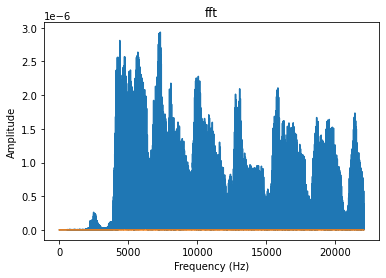

In [8]:
from scipy.fftpack import fft


def calcula_fft(audio, fs):
    period = 1/fs
    print(f"Sample rate: {fs} \nPeriod: {period}")
    number_of_points = len(audio)
    yf = fft(audio)
    yf = yf[0:int(number_of_points//2)] #per eliminar la part negativa de la FFT
    signal_fft = 2.0/number_of_points * yf
    f_final = 1.0/(2.0*period)
    print('valor final de frequencia: ',f_final)
    xf = np.linspace(0.0, 1.0/(2.0*sampling_period), number_of_points//2) #per tenir el mateix num. de punts
    return signal_fft, xf



sampling_period = time[1]-time[0]
signal_fft, xf = calcula_fft(f_audio, fs)

fig, (a1) = plt.subplots(1)
a1.plot(xf, np.abs(signal_fft))

plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.title("fft")
plt.show()

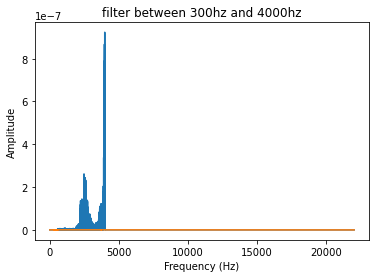

In [9]:
points_per_freq = len(xf)/(fs/2)

#Our target frequency is 
target_300 = int(points_per_freq * 300)
target_4000 = int(points_per_freq * 4000)
yfinal = np.copy(signal_fft)
# we filter the signal (low-pass)
# cut-off frequency = 15kHz
yfinal[ :target_300] = 0
yfinal[target_4000 -1:] = 0

plt.plot(xf,np.abs(yfinal))
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.title("filter between 300hz and 4000hz")
plt.show()

### 3.- Digitalitzeu-la amb Manchester

In [42]:
from manchester_code import encode

#pip install git+https://github.com/fphammerle/python-manchester-code.git

bit_code = []
manchester_codification = []
for code in norm_new_signal:
    positive = int(f'{code[0]:08b}')
    negative = int(f'{code[1]:08b}')
    
    m_code = encode([positive , negative])
    
    code_str = ''.join(f'{m:08b}' for m in m_code)
    manchester_codification.append(code_str)



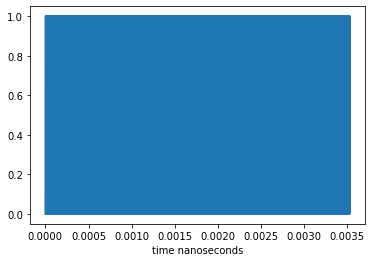

3528000
[0 1 0 ... 1 0 1]


In [13]:
signal_stream = []
signal_time = []
contador = 0

for bin_string in manchester_codification:
    for code in bin_string:
        if code == '0':
            signal_stream.append(0)
        else:
            signal_stream.append(1)
        
        signal_time.append(contador)
        contador += 1

signal_stream = np.array(signal_stream)      
signal_time = np.array(signal_time)
signal_time = signal_time*1E-9

plt.plot(signal_time, signal_stream)
plt.xlabel("time nanoseconds")
plt.show()

print(len(signal_time))
print(signal_stream)


### 4.- Moduleu-la en ASK amb una freqüència de portadora de 100Khz

49999999.0


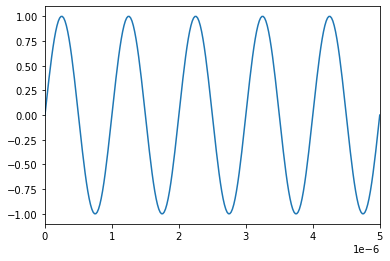

In [14]:
time_carrier = np.linspace(0, 1, 50000000)
t_sampling = (time_carrier[1]-time_carrier[0])
f_sampling = 1/t_sampling
print(f_sampling)
carrier_freq = 1E6  # 100Khz
carrier = np.sin(2*np.pi*carrier_freq*time_carrier)
plt.plot(time_carrier, carrier)
plt.xlim([0,5/carrier_freq])
plt.show()

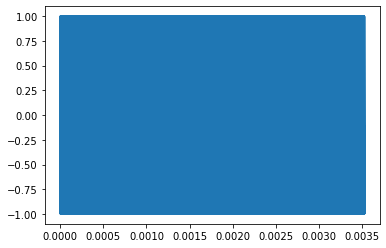

In [15]:
modulated_signal = carrier[0:len(signal_stream)]*signal_stream
plt.plot(signal_time, modulated_signal)
plt.show()


In [16]:
len(modulated_signal)

3528000

In [17]:
len(signal_stream)

3528000

### 5.- Feu tot el procés invers i reproduiu-la

> ####  4 - Moduleu-la en ASK amb una freqüència de portadora de 100Khz 

49999999.0


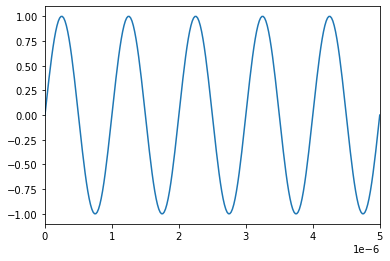

In [18]:
time_carrier = np.linspace(0, 1, 50000000)
t_sampling = (time_carrier[1]-time_carrier[0])
f_sampling = 1/t_sampling
print(f_sampling)
carrier_freq = 1E6     # 100Khz
carrier = np.sin(2*np.pi*carrier_freq*time_carrier)
plt.plot(time_carrier, carrier)
plt.xlim([0,5/carrier_freq])
plt.show()


In [19]:
signal_stream_reverse = modulated_signal / carrier[0:len(modulated_signal)]

count = 0
for i in range(len(signal_stream_reverse)):
    if signal_stream_reverse[i] != signal_stream_reverse[i]: # set nan value
        signal_stream_reverse[i] = 0

signal_stream_reverse

C:\Users\JUNJIE_LI\AppData\Local\Temp\ipykernel_8508\2170959160.py:1: RuntimeWarning: invalid value encountered in true_divide
  signal_stream_reverse = modulated_signal / carrier[0:len(modulated_signal)]


array([0., 1., 0., ..., 1., 0., 1.])

> ####  3 - Digitalitzeu-la amb Manchester

In [43]:
manchester_codification_reverse = []

count = 0
str_code = []
code_string = ""
for bit in signal_stream_reverse:
    code_string += str(int(bit))
    count += 1
    if count > 31:
        manchester_codification_reverse.append(code_string)
        code_string = ""
        count = 0


In [21]:
manchester_codification_reverse == manchester_codification

True

In [22]:
from manchester_code import encode

#pip install git+https://github.com/fphammerle/python-manchester-code.git

bit_code = []
manchester_codification = []

print(norm_new_signal[:10])
for code in norm_new_signal[:10]:
    positive = int(f'{code[0]:08b}')
    negative = int(f'{code[1]:08b}')


    m_code = encode([positive , negative])
    print(m_code)

    code_str = ''.join(f'{m:08b}' for m in m_code)
    manchester_codification.append(code_str)


print(manchester_codification[:10])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
b'UUUU'
b'UUUU'
b'UUUU'
b'UUUU'
b'UUUU'
b'UUUU'
b'UUUU'
b'UUUU'
b'UUUU'
b'UUUU'
['01010101010101010101010101010101', '01010101010101010101010101010101', '01010101010101010101010101010101', '01010101010101010101010101010101', '01010101010101010101010101010101', '01010101010101010101010101010101', '01010101010101010101010101010101', '01010101010101010101010101010101', '01010101010101010101010101010101', '01010101010101010101010101010101']


In [68]:
from manchester_code import decode

# manchester_codification_reverse[:10] 

norm_new_signal_reverse = []

count = 0

for manchester_str in manchester_codification_reverse:
    intvalue1 = manchester_str[:8]
    intvalue2 = manchester_str[9:16]
    intvalue3 = manchester_str[17:24]
    intvalue4 = manchester_str[25:32]

    # print(chr(int(intvalue1,2)).encode() )

    # decode([ chr(int(intvalue1,2)).encode() ])

    try:
        # print([ int(intvalue1,2).to_bytes(2,'big'), int(intvalue2,2).to_bytes(2,'big',signed=True), int(intvalue3,2).to_bytes(2,'big',signed=True), int(intvalue4,2).to_bytes(2,'big',signed=True) ])   
        # code = decode([ 
        # code = [ chr(int(intvalue1,2)), int(intvalue2,2), int(intvalue3,2), int(intvalue4,2) ]
            # ])
        code = decode([ int(intvalue1,2), int(intvalue2,2), int(intvalue3,2), int(intvalue4,2) ])
        # print(code)
        norm_new_signal_reverse.append(list(code))
    except Exception as e:
        #print(e)
        count += 1
        
norm_new_signal_reverse = np.array(norm_new_signal_reverse)
# print( count / len(norm_new_signal_reverse))

0.14987484355444305


>### 2.- Filtreu-la entre 300 Hz i 4000Hz

In [83]:
# new_sig = ifft(yfinal) # signal_fft

# print(len(new_sig))

# xt = np.linspace(0,5,target_4000)
# plt.plot(xt,new_sig[0:target_4000])

# norm_new_signal = np.int16(new_sig*32767/new_sig.max())

# print(new_sig.max())

new_sig_revers = np.complex64(norm_new_signal_reverse * new_sig.max() / 32767)
yfinal_revers = fft(new_sig_revers)

C:\Users\JUNJIE_LI\AppData\Local\Temp\ipykernel_8508\194731340.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  new_sig_revers = np.complex64(norm_new_signal_reverse * int(new_sig.max()) / 32767)


TypeError: unsupported operand type(s) for /: 'list' and 'int'

> ### 1.- Fer una captura durant 2 segons de la vostra veu

In [81]:
from scipy.fftpack import ifft

new_sig_revers = ifft(yfinal_revers) # signal_fft
print(len(new_sig_revers))
xt = np.linspace(0,5,target_4000)
plt.plot(xt,new_sig_revers[0:target_4000])

norm_new_signal = np.int16(new_sig_revers*32767/new_sig_revers.max())
write("filtered_signal_op.wav", fs, norm_new_signal)

sd.play(norm_new_signal, 44100)


# myrecording_reverse =

# sd.play(myrecording_reverse, 44100)

NameError: name 'yfinal_revers' is not defined